In [1]:
!pip install tensorflow

In [4]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense


In [5]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [12]:
x_train = x_train/255
x_test = x_test/255

In [13]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation = "relu"))
model.add(Dense(10,activation = "softmax"))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [16]:
model.fit(x_train,y_train,epochs = 10,validation_split = 0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1072 - loss: 2.3019 - val_accuracy: 0.1060 - val_loss: 2.3021
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1133 - loss: 2.3012 - val_accuracy: 0.1060 - val_loss: 2.3015
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1145 - loss: 2.3006 - val_accuracy: 0.1060 - val_loss: 2.3014
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.1136 - loss: 2.3004 - val_accuracy: 0.1060 - val_loss: 2.3004
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1145 - loss: 2.2992 - val_accuracy: 0.1060 - val_loss: 2.2987
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1177 - loss: 2.2964 - val_accuracy: 0.1060 - val_loss: 2.2952
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.1137 - loss: 2.2934 - val_accuracy: 0.1126 - val_loss: 2.2894
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1262 - loss: 2.2864 - 

In [18]:
y_prob = model.predict(x_test)
y_pred = y_prob.argmax(axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


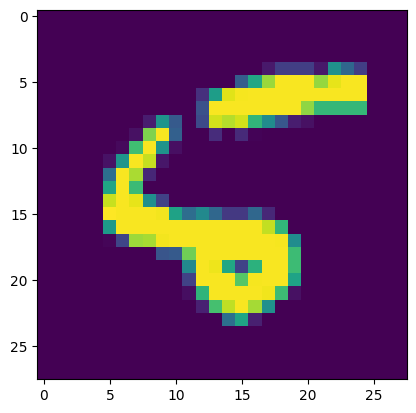

In [23]:
import matplotlib.pyplot as plt
plt.imshow(x_test[8])